https://www.kaggle.com/c/cifar-10/overview

In [ ]:
!pip install keras

In [ ]:
import tensorflow
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


So images are total 60000 in 32x32 size with 3 channels i.e RGB (1 channel means grayscale with shades ranging from black(0) to white(255))

In [ ]:
print(y_train[:,:10]) #numpy array not pandas dataframe

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
import numpy as np

#Convert the list of images to a NumPy array
X_train = np.array(x_train)
X_test = np.array(x_test)

#Ensure data type is float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train = [image / 255.0 for image in X_train]
X_test = [image / 255.0 for image in X_test]

print(X_test[0])

[[[0.61960787 0.4392157  0.19215687]
  [0.62352943 0.43529412 0.18431373]
  [0.64705884 0.45490196 0.2       ]
  ...
  [0.5372549  0.37254903 0.14117648]
  [0.49411765 0.35686275 0.14117648]
  [0.45490196 0.33333334 0.12941177]]

 [[0.59607846 0.4392157  0.2       ]
  [0.5921569  0.43137255 0.15686275]
  [0.62352943 0.44705883 0.1764706 ]
  ...
  [0.53333336 0.37254903 0.12156863]
  [0.49019608 0.35686275 0.1254902 ]
  [0.46666667 0.34509805 0.13333334]]

 [[0.5921569  0.43137255 0.18431373]
  [0.5921569  0.42745098 0.12941177]
  [0.61960787 0.43529412 0.14117648]
  ...
  [0.54509807 0.38431373 0.13333334]
  [0.50980395 0.37254903 0.13333334]
  [0.47058824 0.34901962 0.12941177]]

 ...

 [[0.26666668 0.4862745  0.69411767]
  [0.16470589 0.39215687 0.5803922 ]
  [0.12156863 0.34509805 0.5372549 ]
  ...
  [0.14901961 0.38039216 0.57254905]
  [0.05098039 0.2509804  0.42352942]
  [0.15686275 0.33333334 0.49803922]]

 [[0.23921569 0.45490196 0.65882355]
  [0.19215687 0.4        0.5803922 ]


In [ ]:
#We need to reshape our train_data to be of shape (samples, height, width, channels)
#to pass to Conv2D layer of keras

final_x_train = np.array(X_train).reshape(50000, 32, 32, 3)
final_x_test = np.array(X_test).reshape(10000, 32, 32, 3)

In [ ]:
#CIFAR-10 consists of 60,000 32x32 color images
#containing one of 10 object classes, with 6000 images per class
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

In [ ]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 10)                250890    
                                                                 
Total params: 271146 (1.03 MB)
Trainable params: 271146 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
results = model.fit(final_x_train, y_train_one_hot, validation_split = 0.2, epochs=10, batch_size=250)

Epoch 1/10
160/160 [==============================] - 157s 979ms/step - loss: 1.6423 - accuracy: 0.4137 - val_loss: 1.4265 - val_accuracy: 0.5025
Epoch 2/10
160/160 [==============================] - 156s 973ms/step - loss: 1.2807 - accuracy: 0.5518 - val_loss: 1.2751 - val_accuracy: 0.5438
Epoch 3/10
160/160 [==============================] - 152s 953ms/step - loss: 1.1285 - accuracy: 0.6067 - val_loss: 1.1588 - val_accuracy: 0.5978
Epoch 4/10
160/160 [==============================] - 154s 963ms/step - loss: 1.0234 - accuracy: 0.6471 - val_loss: 1.1388 - val_accuracy: 0.6098
Epoch 5/10
160/160 [==============================] - 151s 944ms/step - loss: 0.9451 - accuracy: 0.6762 - val_loss: 1.1005 - val_accuracy: 0.6144
Epoch 6/10
160/160 [==============================] - 149s 932ms/step - loss: 0.8849 - accuracy: 0.6952 - val_loss: 1.0693 - val_accuracy: 0.6338
Epoch 7/10
160/160 [==============================] - 150s 938ms/step - loss: 0.8117 - accuracy: 0.7243 - val_loss: 1.0539 -

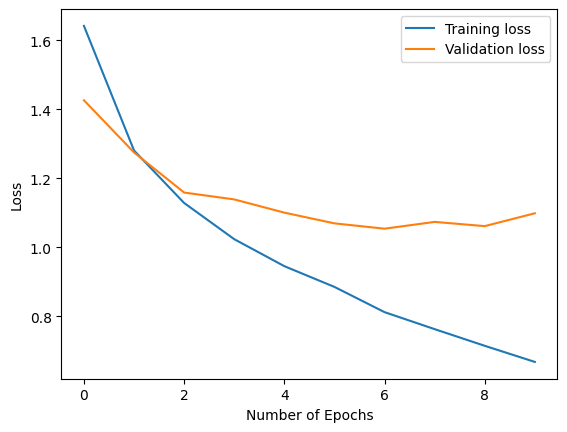

In [ ]:
import matplotlib.pyplot as plt

results.history.keys()
plt.plot(range(len(results.history['loss'])), results.history['loss'], label='Training loss')
plt.plot(range(len(results.history['loss'])), results.history['val_loss'], label='Validation loss')

plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

plt.show()

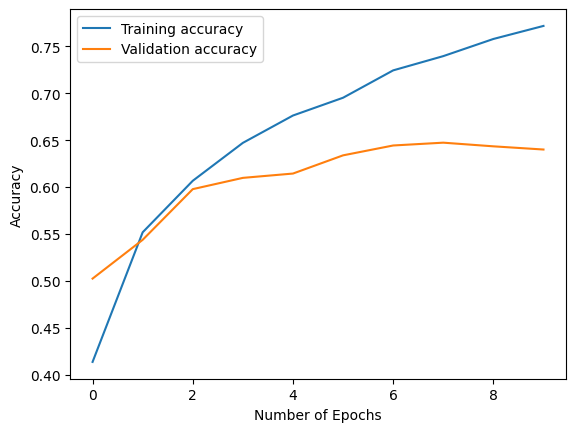

In [ ]:
plt.plot(range(len(results.history['accuracy'])), results.history['accuracy'], label='Training accuracy')
plt.plot(range(len(results.history['accuracy'])), results.history['val_accuracy'], label='Validation accuracy')

plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()

plt.show()

In [ ]:
loss,acc = model.evaluate(final_x_train, y_train_one_hot,verbose=0)
print('Train accuracy is ', acc*100, '%')

Train accuracy is  77.32599973678589 %


In [ ]:
loss,acc = model.evaluate(final_x_test, y_test_one_hot,verbose=0)
print('Test accuracy is ', acc*100, '%')

Test accuracy is  63.05000185966492 %


In [ ]:
predicted_classes = model.predict(final_x_test)
predicted_classes

313/313 [==============================] - 12s 37ms/step


array([[5.3445599e-04, 4.5669101e-05, 3.5200432e-02, ..., 3.1132144e-03,
        2.1532548e-03, 2.7209154e-04],
       [1.5375777e-03, 1.5166623e-02, 9.3645887e-08, ..., 9.5268353e-09,
        9.8292142e-01, 3.7425815e-04],
       [5.5185199e-01, 1.5521133e-01, 3.2466711e-03, ..., 6.5956069e-03,
        1.3888855e-01, 1.3436697e-01],
       ...,
       [7.0669805e-05, 5.3027600e-07, 1.7806780e-01, ..., 1.1469852e-02,
        1.2569793e-05, 2.0149537e-05],
       [2.2914678e-02, 2.1204594e-01, 1.7244916e-02, ..., 1.1953241e-03,
        1.9759580e-04, 3.4030847e-02],
       [4.4336535e-05, 2.0442162e-04, 7.2376098e-04, ..., 8.1354117e-01,
        1.0844391e-05, 3.1141832e-04]], dtype=float32)

In [ ]:
print("Single row: ",y_test_one_hot[0])

Single row:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
#get the index of the column containing 1 in the first row
column_index = np.argmax(y_test_one_hot[0])

print("Column index containing 1 in Row 0:", column_index)

Column index containing 1 in Row 0: 3


In [ ]:
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        index += 1

1/1 [==============================] - 0s 25ms/step


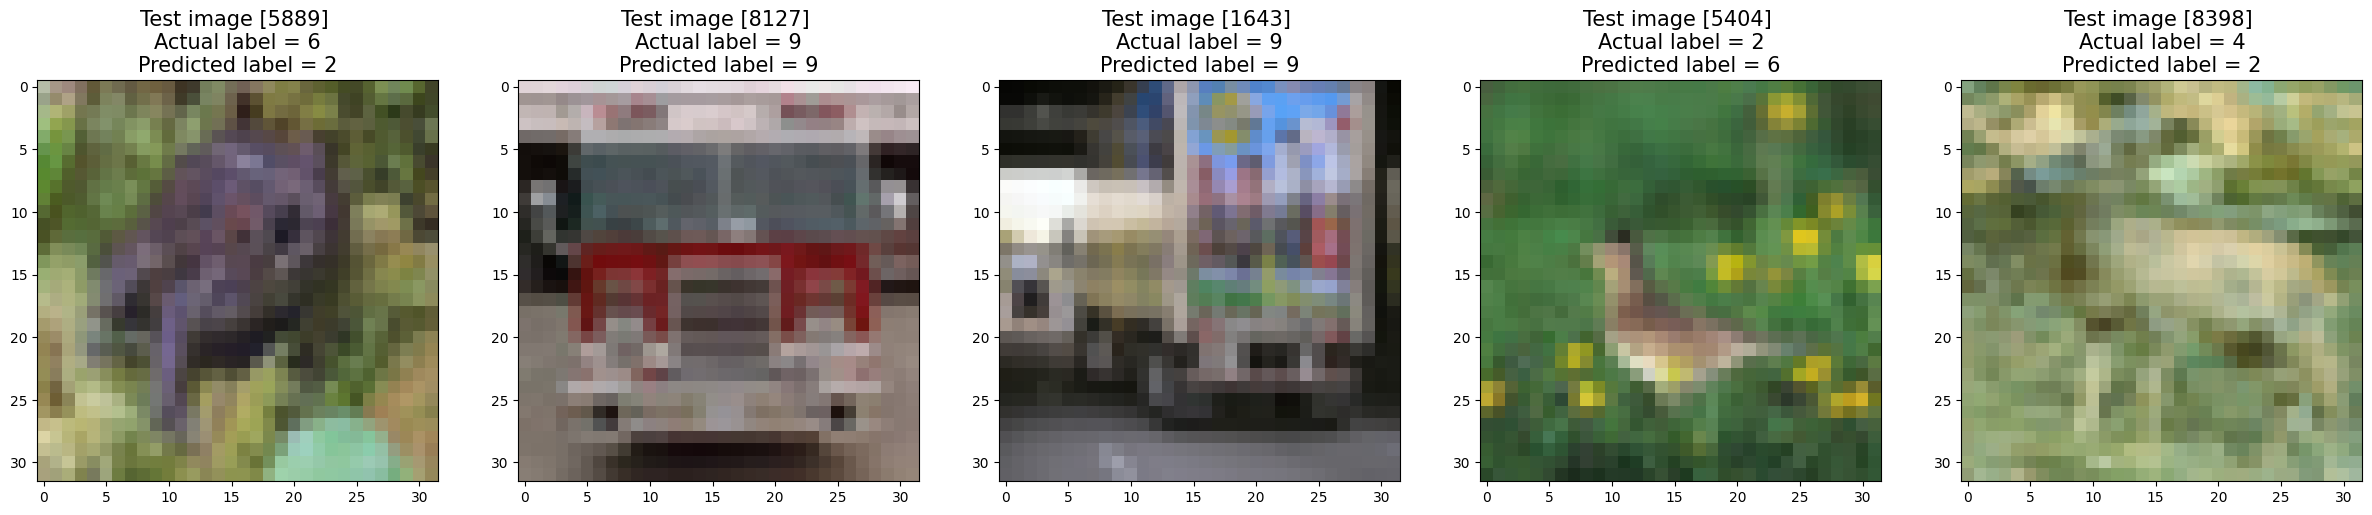

In [ ]:
import random

test_images = []
titles = []

for i in range(5):
    r = random.randint(1, 10000) #we have 10000 images in final_x_test
    sample_to_predict = final_x_test[r:r+1]  # Create a batch with a single sample, without batch it doesn't work
    predicted_label = model.predict(sample_to_predict)

    test_images.append(final_x_test[r])
    titles.append('Test image [' + str(r) + '] \nActual label = ' + str(np.argmax(y_test_one_hot[r])) + '\nPredicted label = ' + str(np.argmax(predicted_label)))

show_images(test_images, titles)